In [2]:
%matplotlib inline

In [3]:
### Import Packages

import matplotlib.pyplot as plt
import numpy as np
import starry
import pandas as pd
from glob import glob
import os
from scipy.interpolate import interp1d
from scipy.linalg import block_diag
import theano
import theano.tensor as tt
import theano.sparse as ts
from scipy.io import readsav

starry.config.lazy = False
starry.config.quiet = True

In [4]:
#### Read in light curves, set an error:
r5_0degree = np.loadtxt("lightcurve_bd/totalflux_r5_0degree.txt")

## Rotation period 5 hours 0 degrees (equator on)
r5_0degree_flux = r5_0degree[1]
r5_0degree_flux = r5_0degree_flux/np.median(r5_0degree_flux)
r5_0degree_flux = r5_0degree_flux.round(4)
time_r5_0degree =  r5_0degree[0]

## Error
sigma=0.001

###### 2M0030

In [5]:
# read in data
M0030_1450 = readsav('2M0030-1450_calibch1_bin5_ap_opt.sav')
time_M0030_1450 = np.array(M0030_1450['bint'][:,0],dtype='float64')
flux_M0030_1450 = np.array(M0030_1450['binflux'][:,0],dtype='float64')
peakp_M0030_1450 = np.array(M0030_1450['peakp'],dtype='float64')
name_M0030_1450=M0030_1450['targ_name'].decode('utf-8')
# calculate error
fluxerr_M0030_1450 = np.zeros_like(flux_M0030_1450) + np.std(flux_M0030_1450 - np.roll(flux_M0030_1450, 1))/np.sqrt(2)

In [6]:
### Map function

def SurfaceMap(flux,ydeg,time,rotation_period,inc_angle,x):
    ## Instantiate the map
    map = starry.Map(ydeg=ydeg, reflected=False)
    map.obl = 0
    map.inc = inc_angle
    map.set_data(flux, C=0.001 ** 2)
    ## Counter for naming files
    x+=1
    ## Other map parameters
    mu = np.empty(map.Ny)
    mu[0] = 1
    mu[1:] = 0
    L = np.empty(map.Ny)
    L[0] = 1e0
    L[1:] = 1e-5
    map.set_prior(L=L)
    nrot=1
    npts = len(time)
    theta = np.linspace(0, 360 * nrot, npts)
    kwargs = dict(theta=theta)
    mu, cho_cov = map.solve(**kwargs)
    map.show(colorbar=True,figsize=(10,10), projection="moll",dpi=500,file="RotationSplit_r5_0degree_ydeg"+str(ydeg)+"/Maps/"+str(i)+"_map.jpg")
    ## Plotting
    fig, ax = plt.subplots(1, figsize=(12, 4))
    plt.plot(time, flux,marker="v",label="Observed")
    plt.text(time[0],1.01,s="t="+str(time[0]),fontsize=20)
    plt.ylim(0.98,1.02)
    plt.plot(time, map.flux(**kwargs),label="fitted")
    plt.legend(prop={'size': 20})
    ax.set_xlabel("Time (hr)", fontsize=20)
    ax.set_ylabel("Normalized flux", fontsize=20)
    plt.savefig("RotationSplit_r5_0degree_ydeg"+str(ydeg)+"/LightCurves/"+str(i)+"_LightCurve.jpg")

In [4]:
### Create an array to index with

## Simulated data
IndexArray = np.arange(0,401,20)
x=0

###### Rotation Period: 5 Hours
###### Inclination Angle: 90 Degrees

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 *

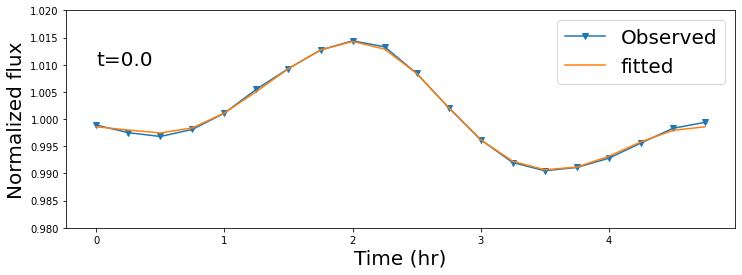

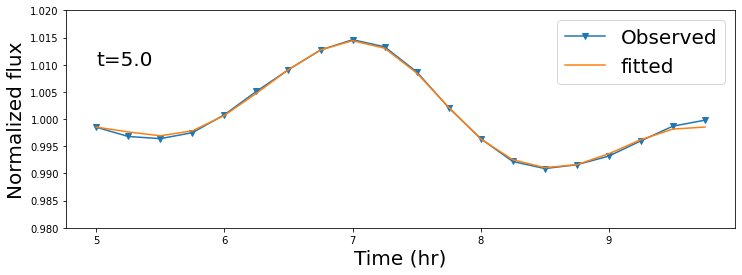

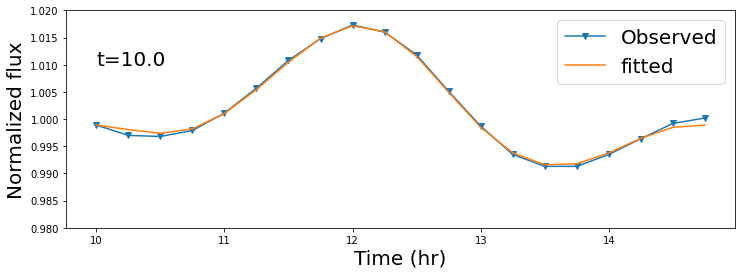

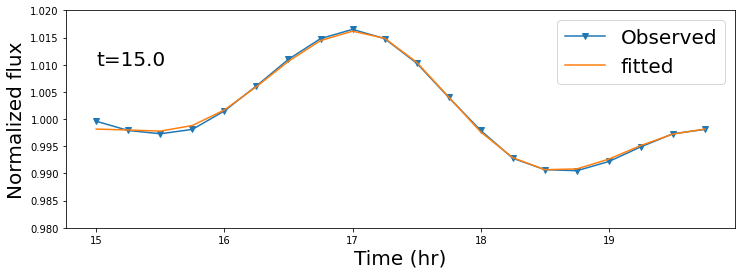

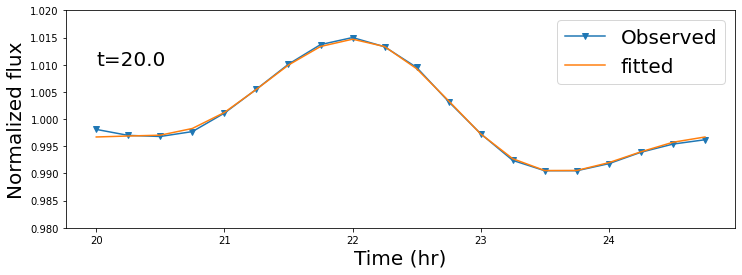

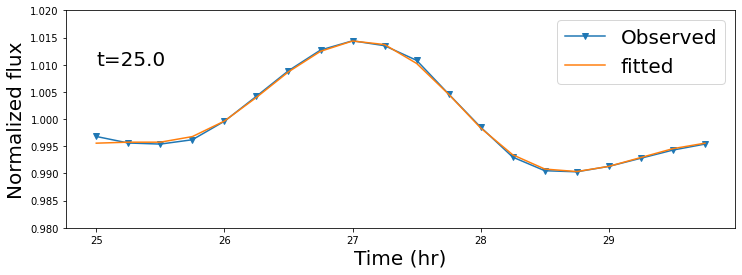

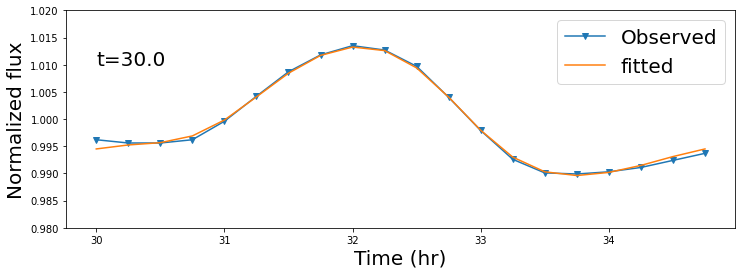

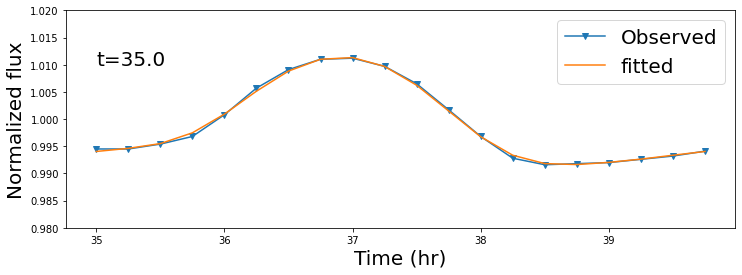

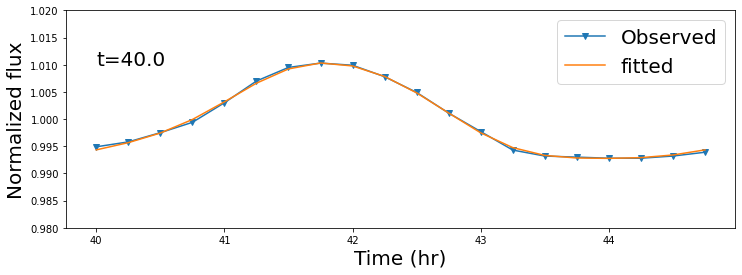

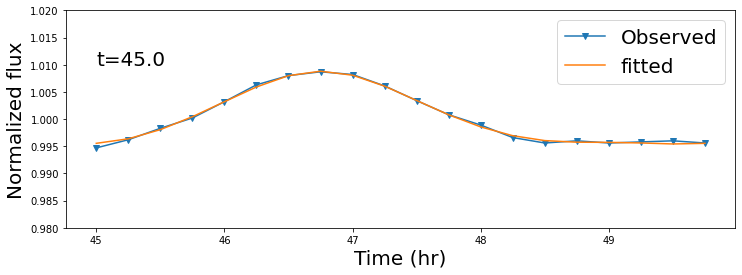

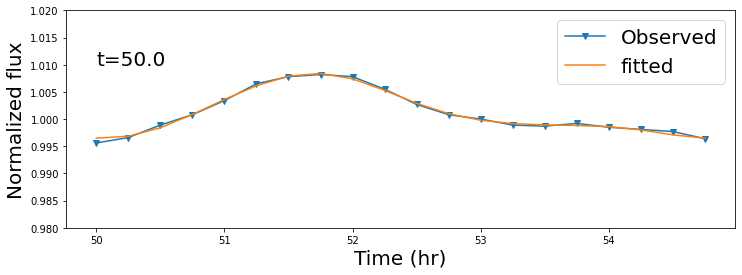

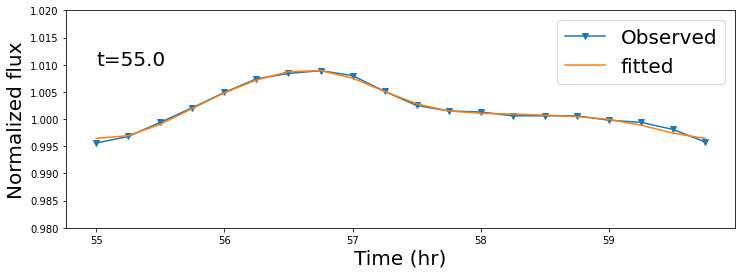

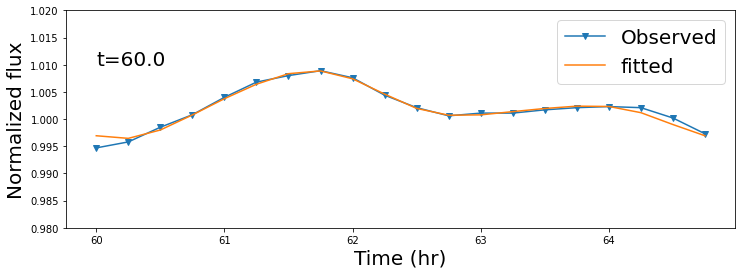

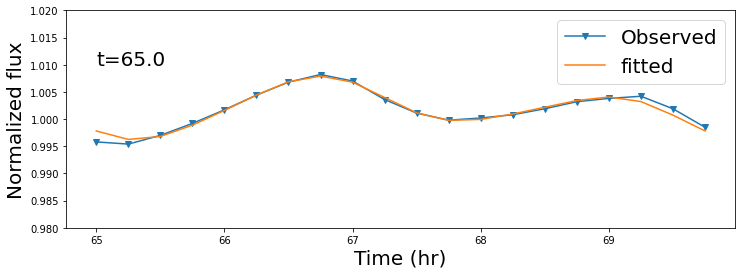

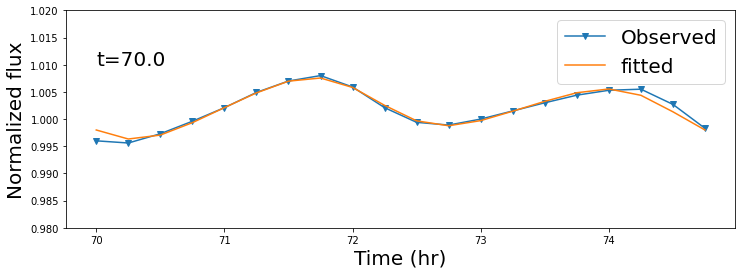

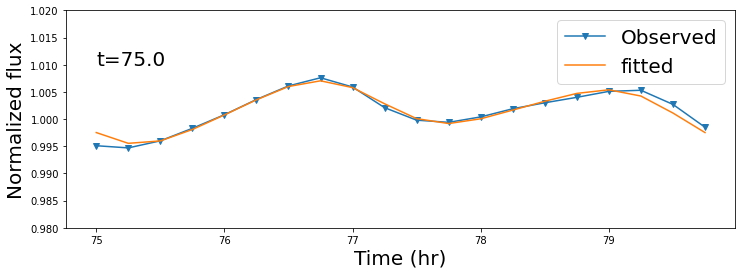

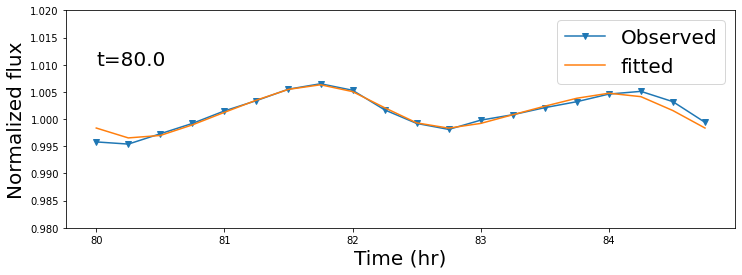

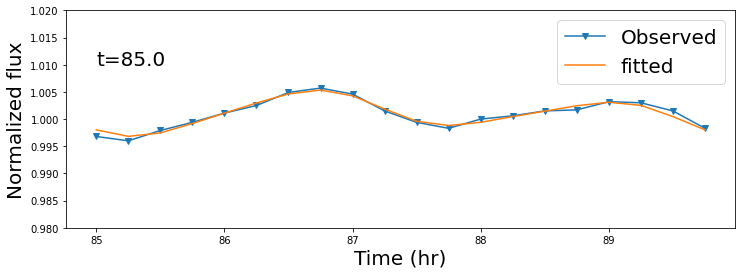

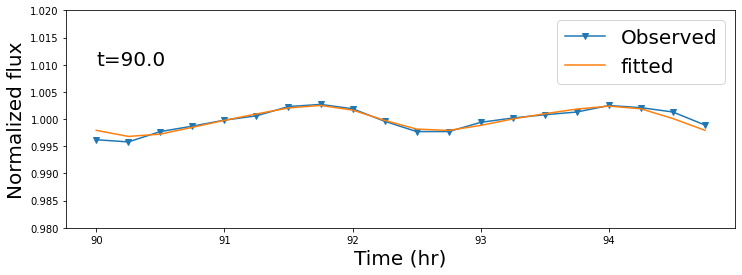

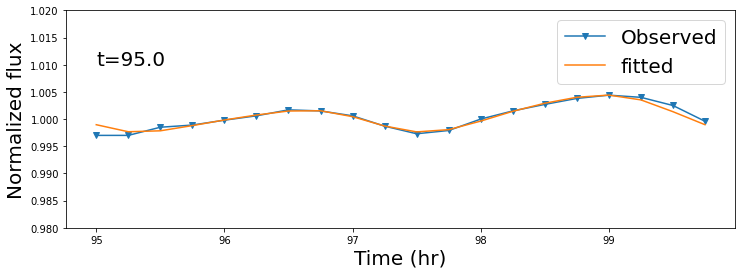

In [5]:
### Create a loop to save multiple maps ydeg 5


ydeg0 = 5
angle = 90
rotp = 5
for i in range(len(IndexArray)-1):
    SurfaceMap(r5_0degree_flux[IndexArray[i]:IndexArray[i+1]],ydeg0,time_r5_0degree[IndexArray[i]:IndexArray[i+1]],rotp,angle,x)

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 *

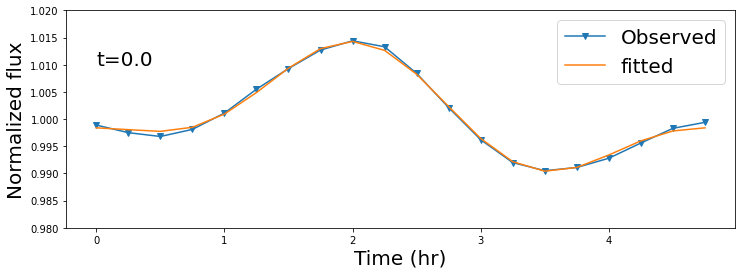

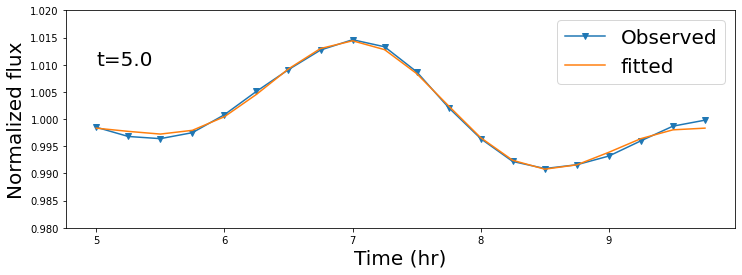

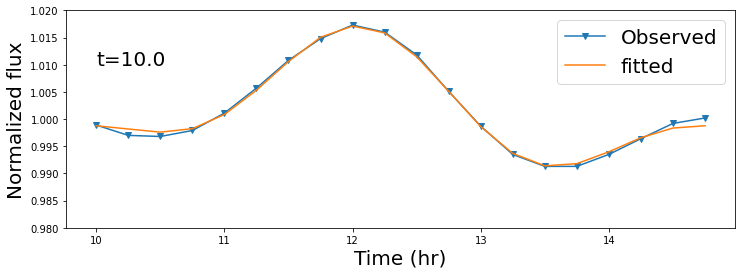

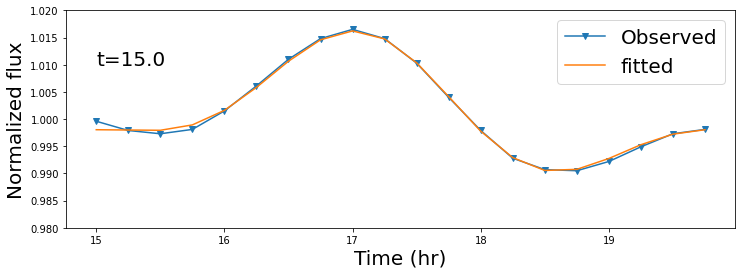

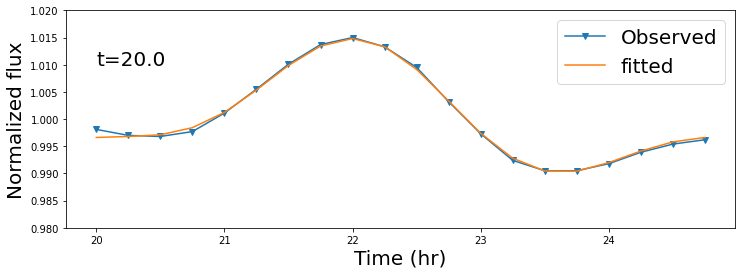

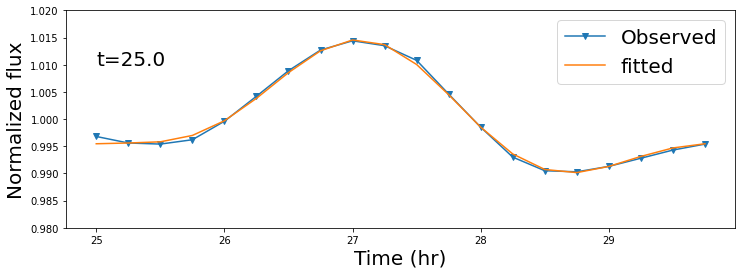

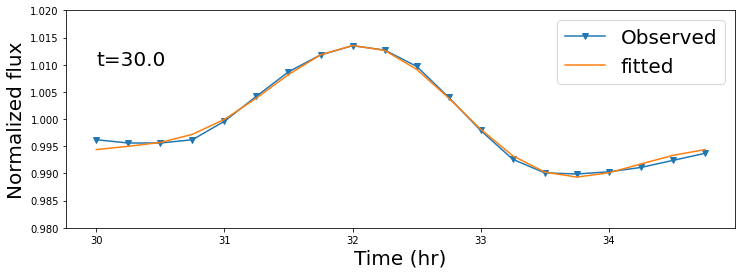

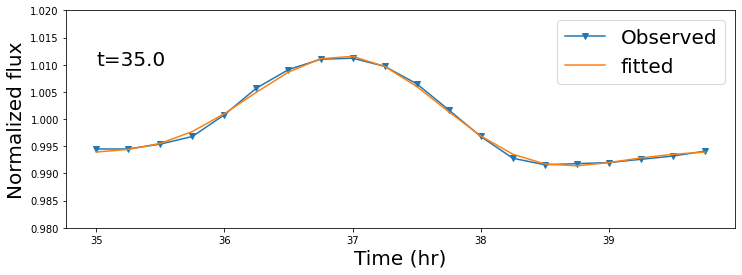

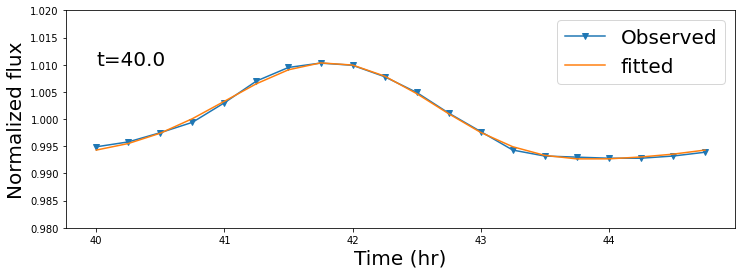

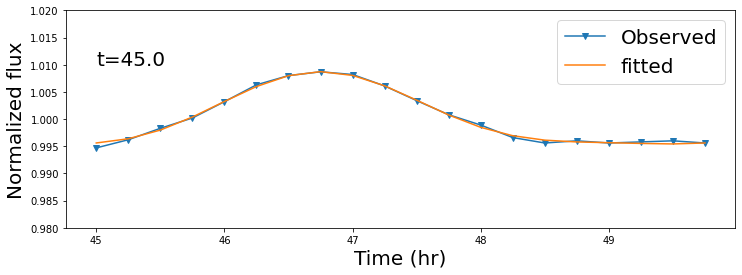

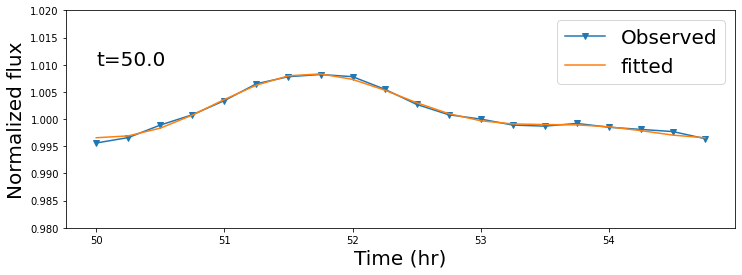

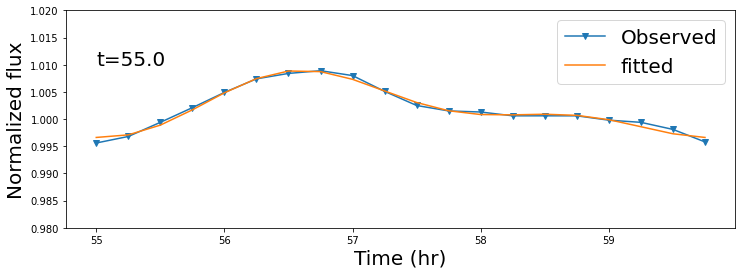

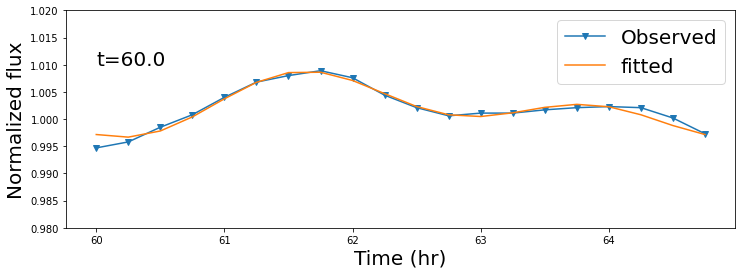

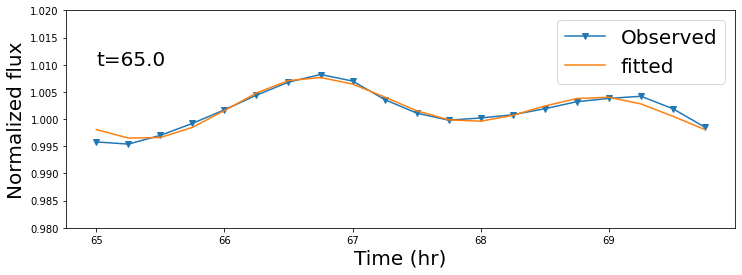

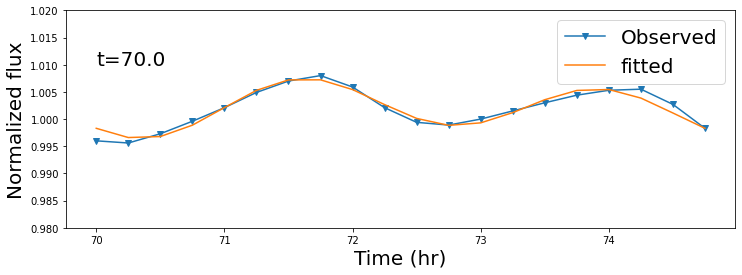

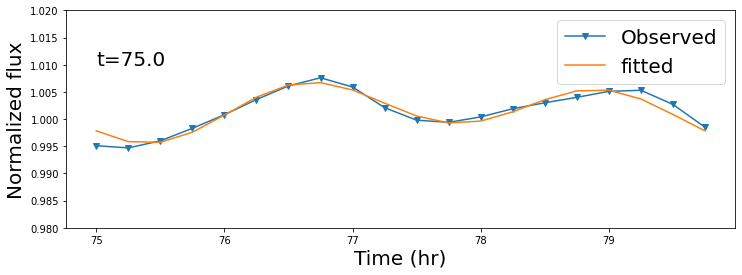

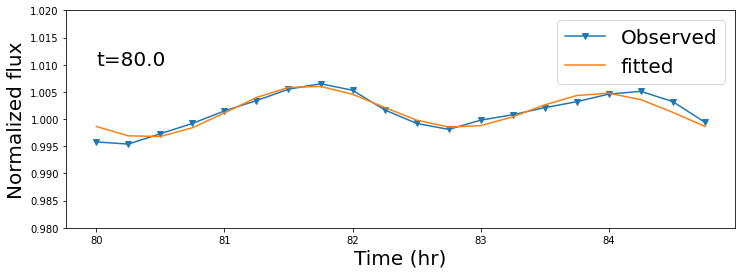

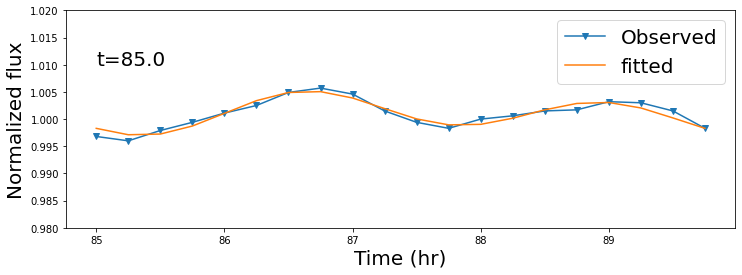

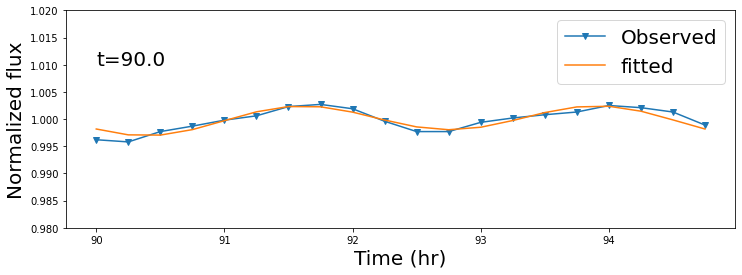

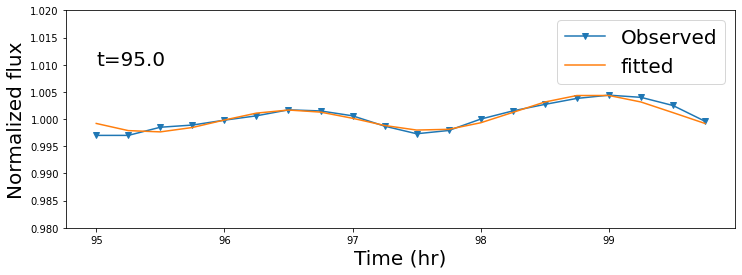

In [9]:
### Create a loop to save multiple maps ydeg 3

for i in range(len(IndexArray)-1):
    SurfaceMap(r5_0degree_flux[IndexArray[i]:IndexArray[i+1]],3,time_r5_0degree[IndexArray[i]:IndexArray[i+1]],5,90,x)

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 *

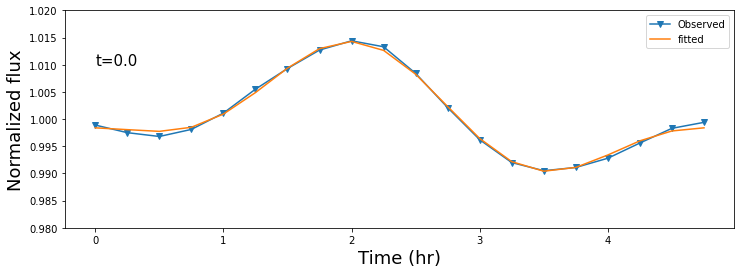

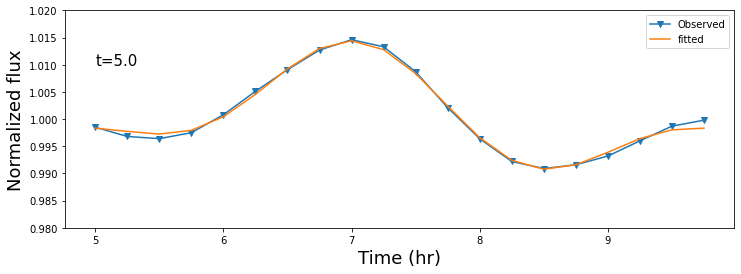

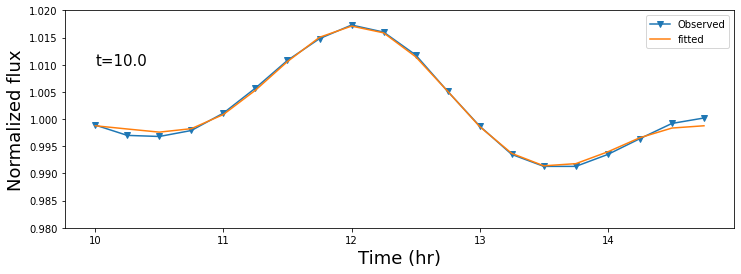

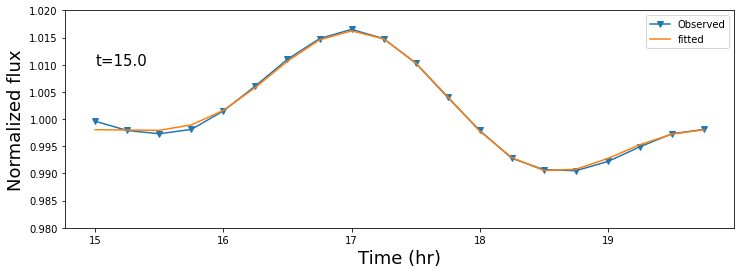

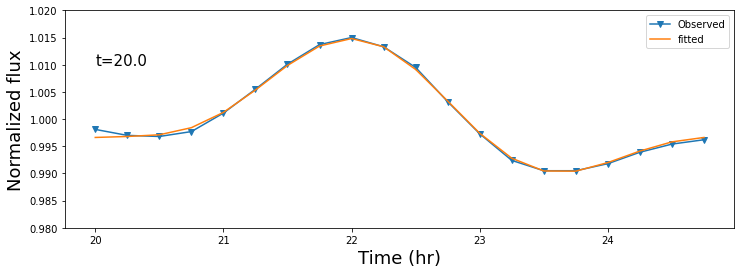

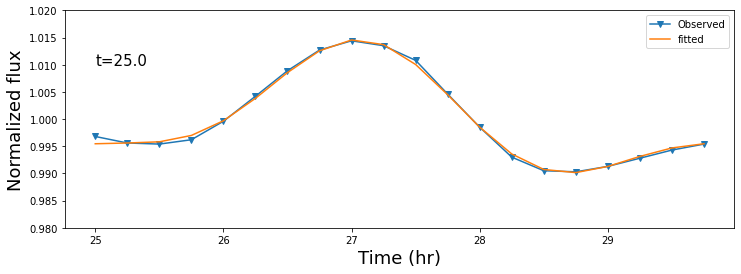

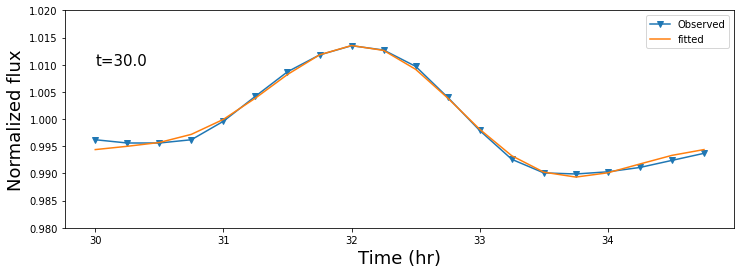

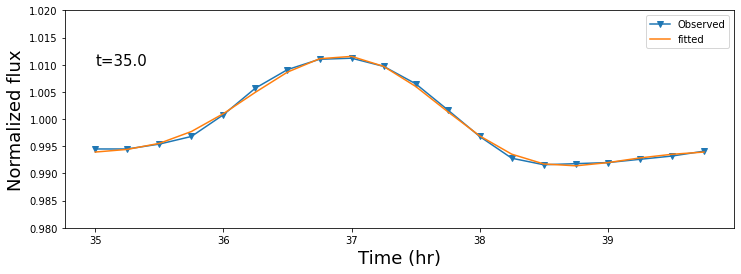

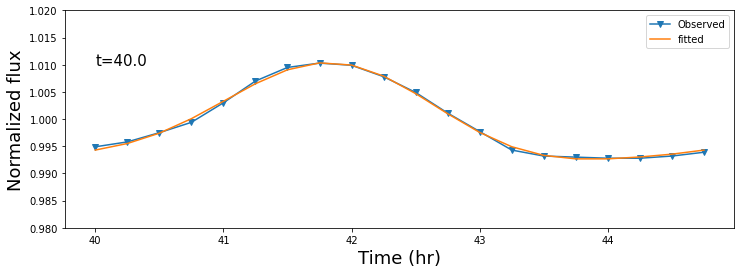

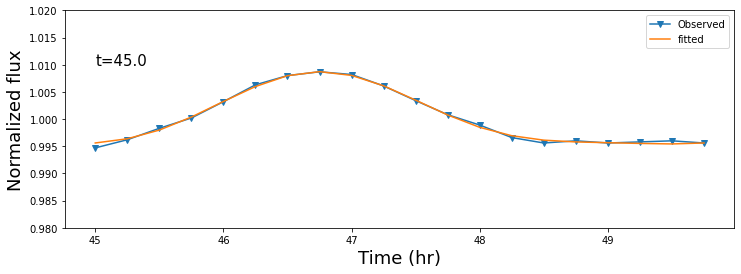

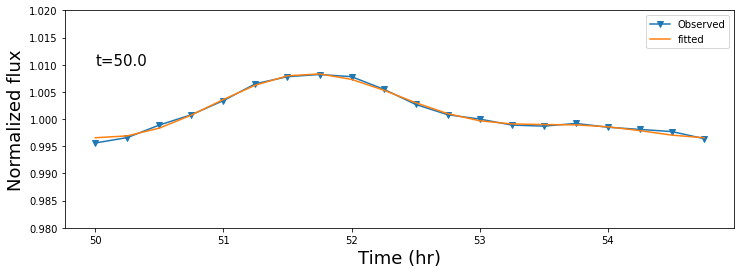

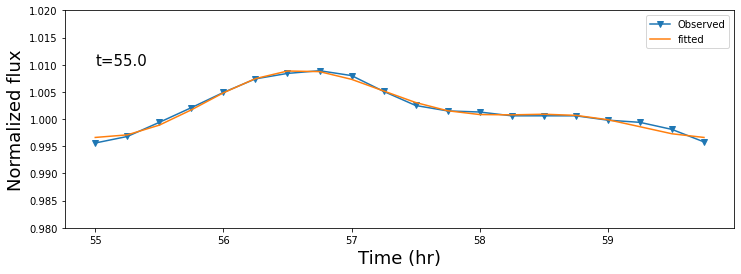

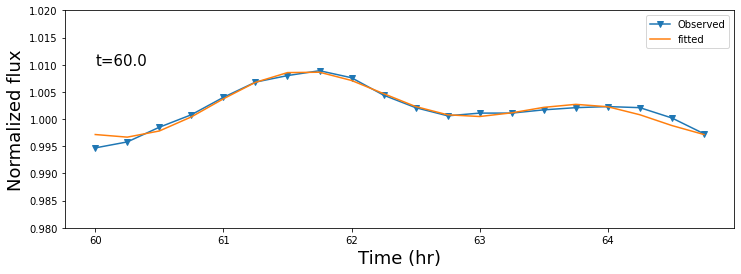

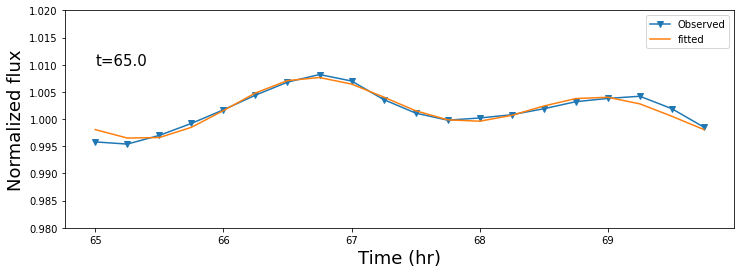

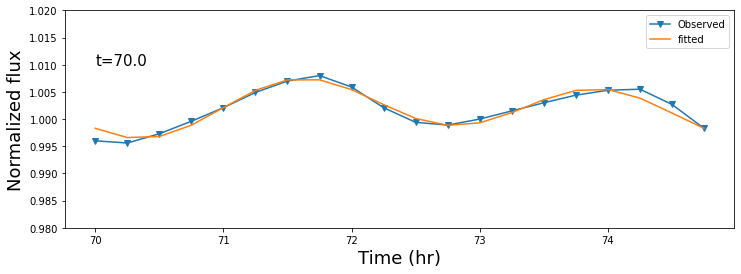

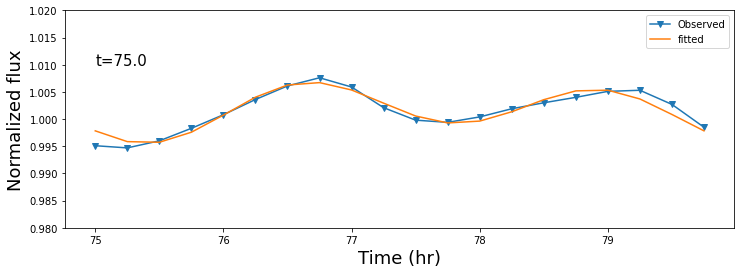

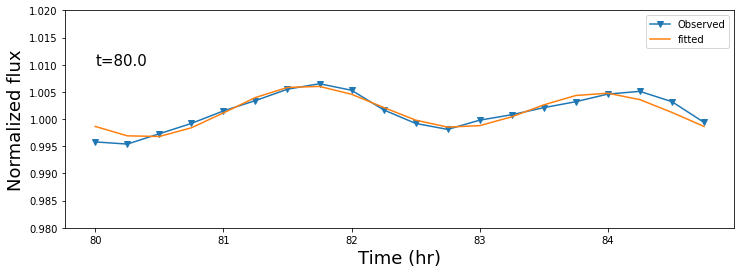

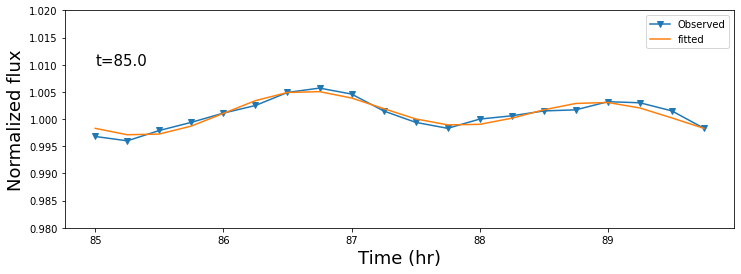

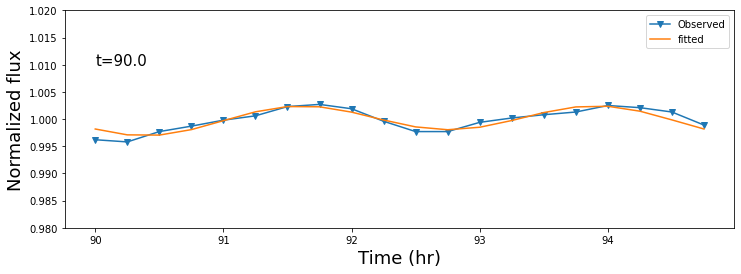

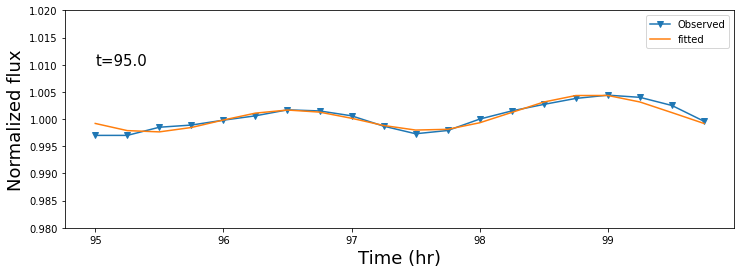

In [23]:
### Create a loop to save multiple maps ydeg 2

for i in range(len(IndexArray)-1):
    SurfaceMap(r5_0degree_flux[IndexArray[i]:IndexArray[i+1]],2,time_r5_0degree[IndexArray[i]:IndexArray[i+1]],5,90,x)

/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 * theta)
/opt/anaconda3/envs/new-starry/lib/python3.7/site-packages/starry/_plotting.py:64: RuntimeWarning: invalid value encountered in true_divide
  2 + 2 * np.cos(2 *

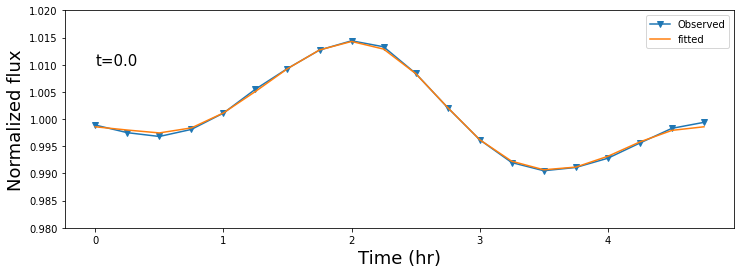

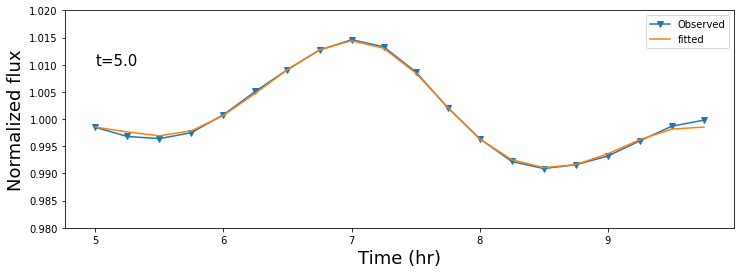

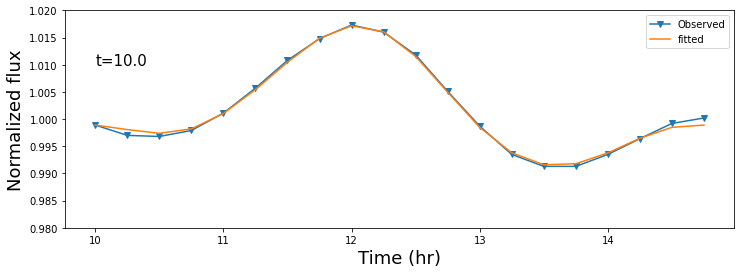

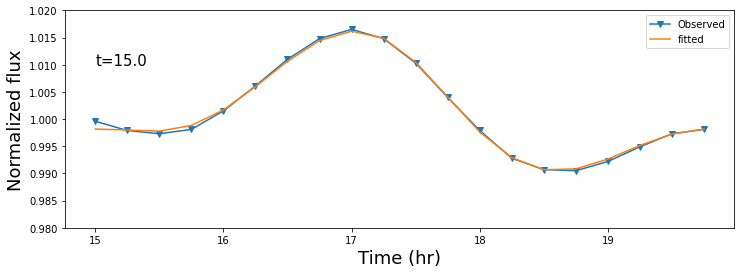

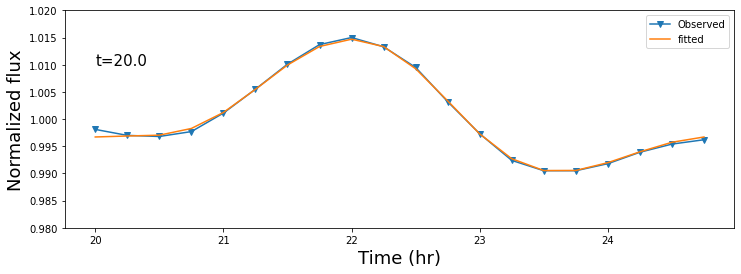

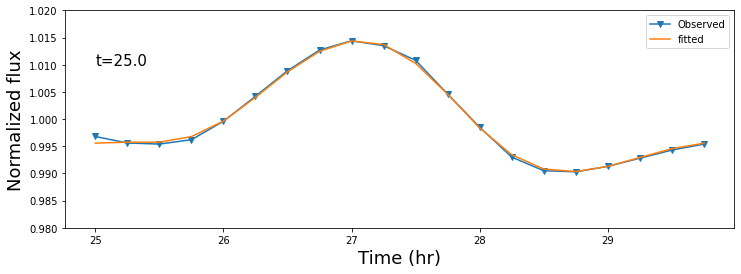

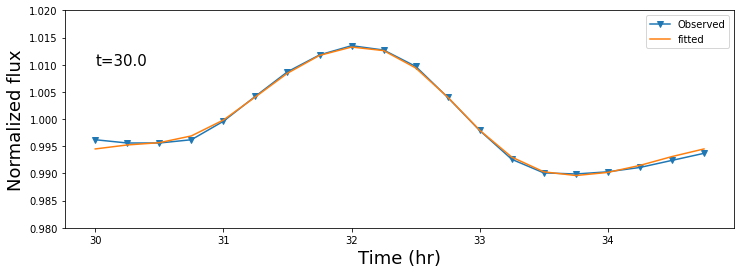

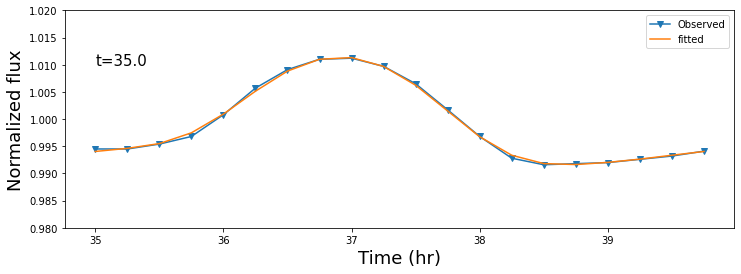

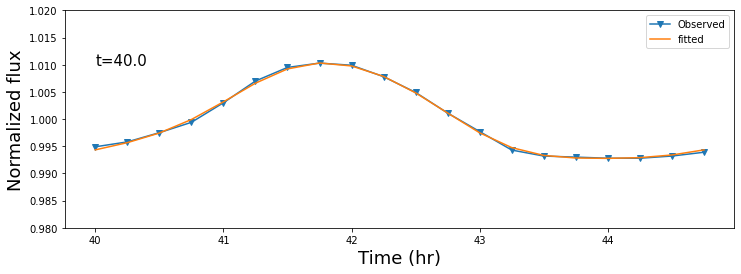

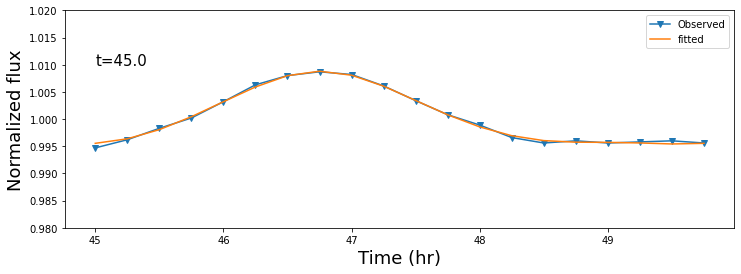

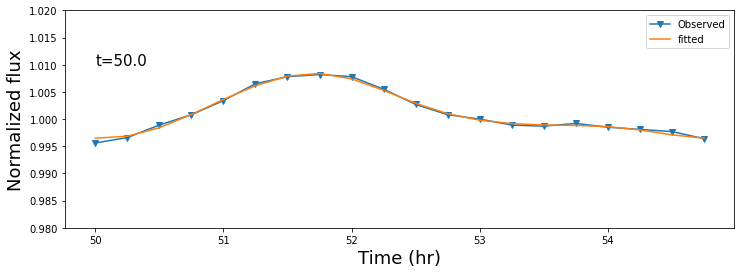

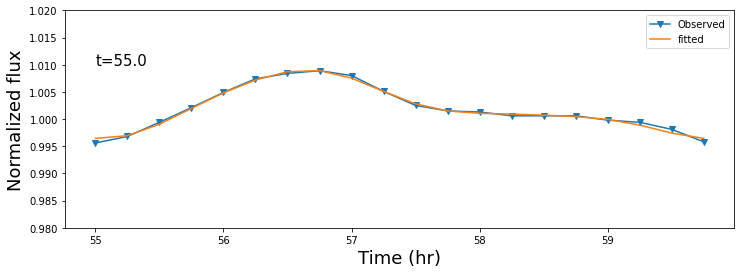

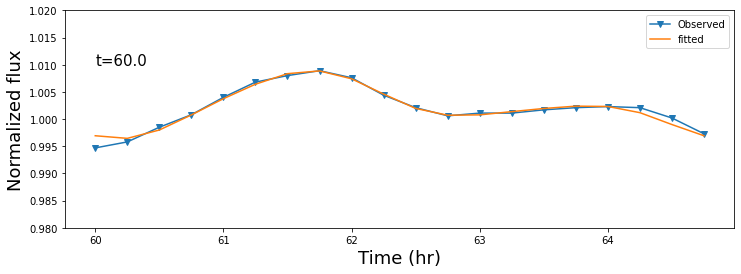

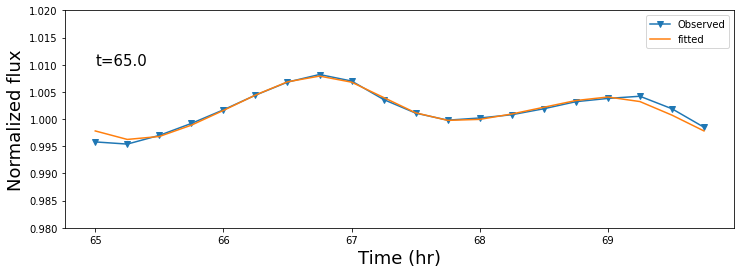

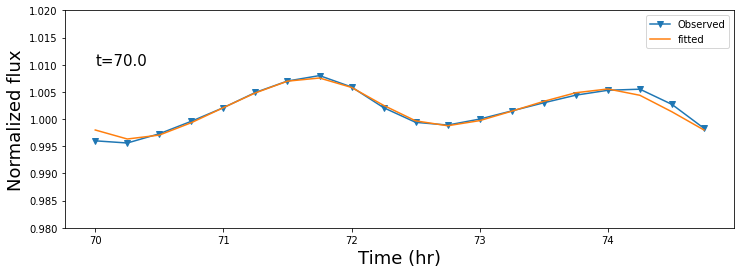

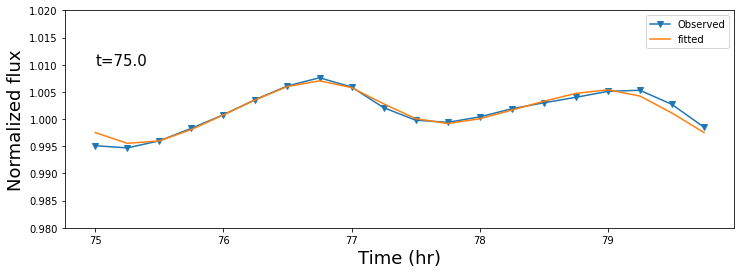

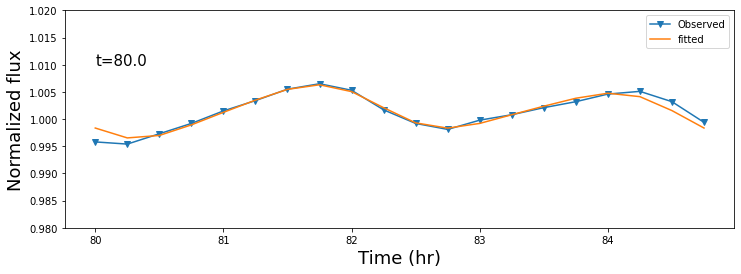

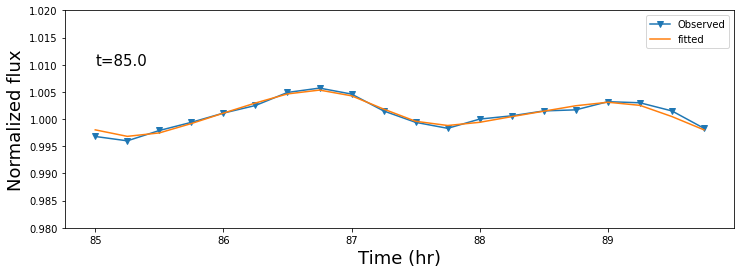

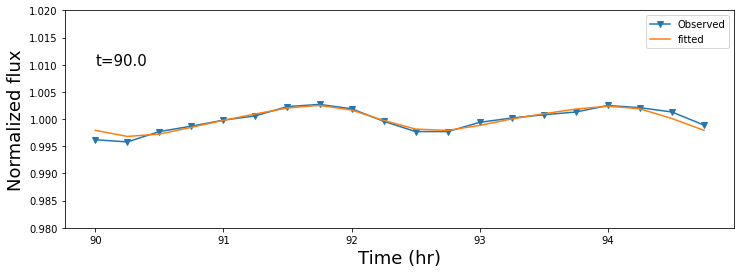

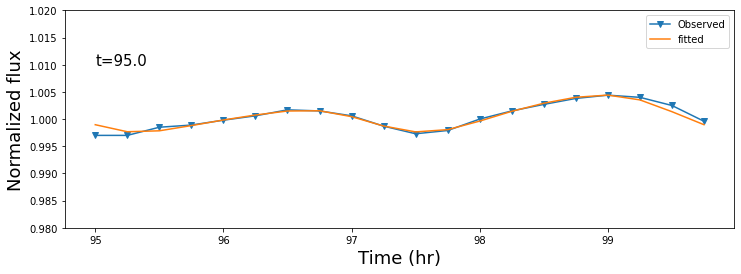

In [24]:
### Create a loop to save multiple maps ydeg 4

for i in range(len(IndexArray)-1):
    SurfaceMap(r5_0degree_flux[IndexArray[i]:IndexArray[i+1]],4,time_r5_0degree[IndexArray[i]:IndexArray[i+1]],5,90,x)

# Plotting t=0, 40 and 80

In [8]:
time_r5_0degree[320:341]

array([80.  , 80.25, 80.5 , 80.75, 81.  , 81.25, 81.5 , 81.75, 82.  ,
       82.25, 82.5 , 82.75, 83.  , 83.25, 83.5 , 83.75, 84.  , 84.25,
       84.5 , 84.75, 85.  ])

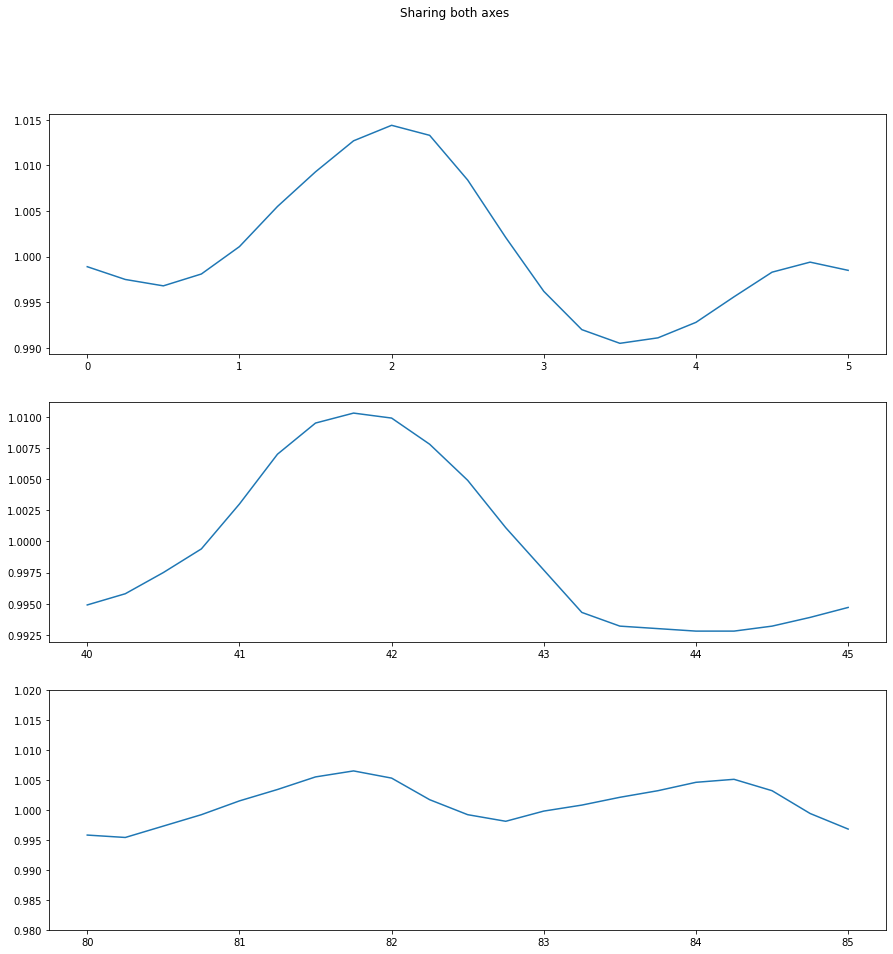

In [16]:
### Taking the data from the full array and making individual variables for the 3 different time intervals
## for the data 
flux_0 = r5_0degree_flux[0:21]
time_0 = time_r5_0degree[0:21]

flux_40 = r5_0degree_flux[160:181]
time_40 = time_r5_0degree[160:181]

flux_80 = r5_0degree_flux[320:341]
time_80 = time_r5_0degree[320:341]

## Making a multiplot for the 3 light curves

fig, axs = plt.subplots(3,figsize=(15,15))
fig.suptitle('Sharing both axes')
plt.ylim(0.98,1.02)
axs[0].plot(time_0,flux_0,label="Observed")
axs[1].plot(time_40,flux_40)
axs[2].plot(time_80,flux_80)